In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML, Image
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
def overlap(df1, df2):
    """Finds overlapping indexes from two dataframes and also the percentage of indexes in df2.
    Coverage is 1 if whole site dat is covered.
    """
    ovlp = df1.index.intersection(df2.index)
    coverage = float(len(ovlp))/float(len(df2.index)) 
    return ovlp, coverage

In [3]:
def timeseries_plot(overlap_idx,d1,d2,d1_label, d2_label):
    """For plotting time series for windspeed from two sites"""
    fig1 = plt.figure()
    ax = fig1.add_subplot(111)
    ax.grid()
    ax.set_ylabel('Wind Speed')
    ax.set_xlabel('Time')
    ax.set_title('Correlation')
    ax.plot(overlap_idx[-300:], d1[overlap_idx[-300:]], alpha=0.8,linewidth=2, label=d1_label)
    ax.plot(overlap_idx[-300:], d2[overlap_idx[-300:]], alpha=0.5, linewidth=2, label =d2_label)
    ax.legend(loc='upper left')
    fig1.set_figwidth(26)
    fig1.set_figheight(10)
    fig1.hold= True
 

In [4]:
def check_svm(reference_train, reference_test, site_train, site_test,kernel_name):
    svm_obj = svm.SVR(kernel=kernel_name)
    svm_obj.fit(site_train, reference_train)
    prediction = svm_obj.predict(site_test)
    print("Mean-absolute error ( "+kernel_name+" ):",mean_absolute_error(reference_test,prediction))
    #plot_for_svm(prediction-site_test,"SVR with kernel "+kernel_name)
    

In [5]:
def plot_for_svm(data, title):
    fig = plt.figure(111)
    scat = fig.add_subplot(111)
    scat.set_xlabel('Prediction - Actual')
    scat.set_ylabel('Data Label')
    scat.set_title(title);
    scat.plot(data,'r.')

    

In [6]:
#Site data is in two files hence reading and combining them into on
site_data_directory = r'C:\Dropbox (brightwind)\RTD\Project_Inder\Pallas\Site_data'
files = os.listdir(site_data_directory)
plants = {}

for file in files:
    temp = pd.read_csv(os.path.join(site_data_directory, file), usecols=['timestamp','error','mrwsmpvwi'],\
                       dayfirst=False, parse_dates=['timestamp'])
    temp = temp.drop(temp[temp['error']!=0].index)
    plant_num = file.replace('-flg-avail.csv','').replace('plant','')
    plants[plant_num] = temp
    print("Finished reading plant " + plant_num, file )
    

Finished reading plant 1 plant1-flg-avail.csv
Finished reading plant 10 plant10-flg-avail.csv
Finished reading plant 11 plant11-flg-avail.csv
Finished reading plant 12 plant12-flg-avail.csv
Finished reading plant 13 plant13-flg-avail.csv
Finished reading plant 14 plant14-flg-avail.csv
Finished reading plant 15 plant15-flg-avail.csv
Finished reading plant 16 plant16-flg-avail.csv
Finished reading plant 17 plant17-flg-avail.csv
Finished reading plant 18 plant18-flg-avail.csv
Finished reading plant 19 plant19-flg-avail.csv
Finished reading plant 2 plant2-flg-avail.csv
Finished reading plant 20 plant20-flg-avail.csv
Finished reading plant 3 plant3-flg-avail.csv
Finished reading plant 4 plant4-flg-avail.csv
Finished reading plant 5 plant5-flg-avail.csv
Finished reading plant 6 plant6-flg-avail.csv
Finished reading plant 7 plant7-flg-avail.csv
Finished reading plant 8 plant8-flg-avail.csv
Finished reading plant 9 plant9-flg-avail.csv


In [7]:
#MERRA-2 data
merra2 = pd.read_csv(r'C:\Dropbox (brightwind)\RTD\Project_Inder\Pallas\merra2_pallas.csv', usecols=['DateTime','WS50m_m/s'],\
                     parse_dates=['DateTime'])
merra2 = merra2.set_index('DateTime')


In [8]:
#Creating hour;y site data for comparison
hourly_plants_data={}

for plant_key in plants.keys():
    hourly_plants_data[plant_key] =plants[plant_key].groupby(pd.Grouper(freq='1H', key='timestamp')).mean().dropna()



Data for Plant  1
Coverage: 0.9981085833022537
R2 coefficient: 0.79359838264


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean-absolute error ( rbf ): 1.23154051375
Mean-absolute error ( linear ): 1.23857516755
Mean-absolute error ( sigmoid ): 19.7797150744
Data for Plant  10
Coverage: 0.9981048726127401
R2 coefficient: 0.776311133609
Mean-absolute error ( rbf ): 1.24895155747
Mean-absolute error ( linear ): 1.25910129071
Mean-absolute error ( sigmoid ): 19.8841308238
Data for Plant  11
Coverage: 0.9981064899390609
R2 coefficient: 0.77715388824
Mean-absolute error ( rbf ): 1.18031372735
Mean-absolute error ( linear ): 1.18934307086
Mean-absolute error ( sigmoid ): 19.7968639495
Data for Plant  12
Coverage: 0.9980995463001379
R2 coefficient: 0.77258402658
Mean-absolute error ( rbf ): 1.1542950711
Mean-absolute error ( linear ): 1.16687178576
Mean-absolute error ( sigmoid ): 19.1106157262
Data for Plant  13
Coverage: 0.9981036831281216
R2 coefficient: 0.791565771415
Mean-absolute error ( rbf ): 1.19920664111
Mean-absolute error ( linear ): 1.21112181718
Mean-absolute error ( sigmoid ): 20.2159659713
Data fo

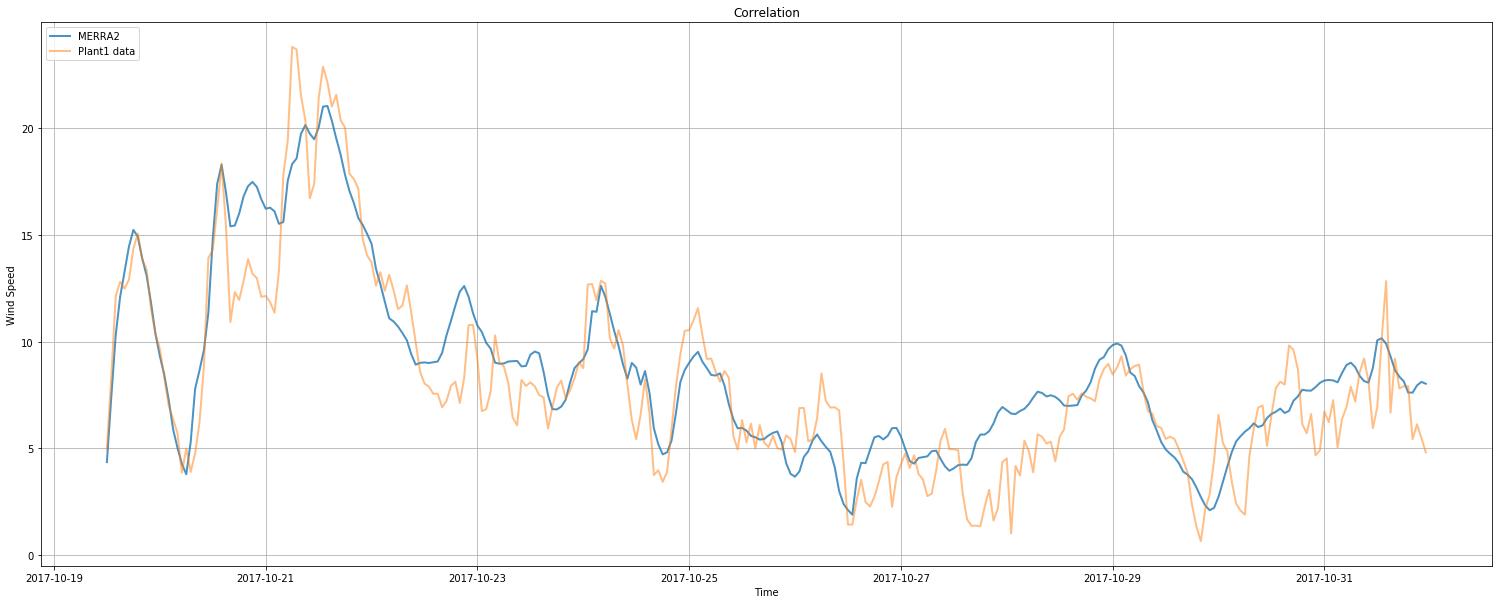

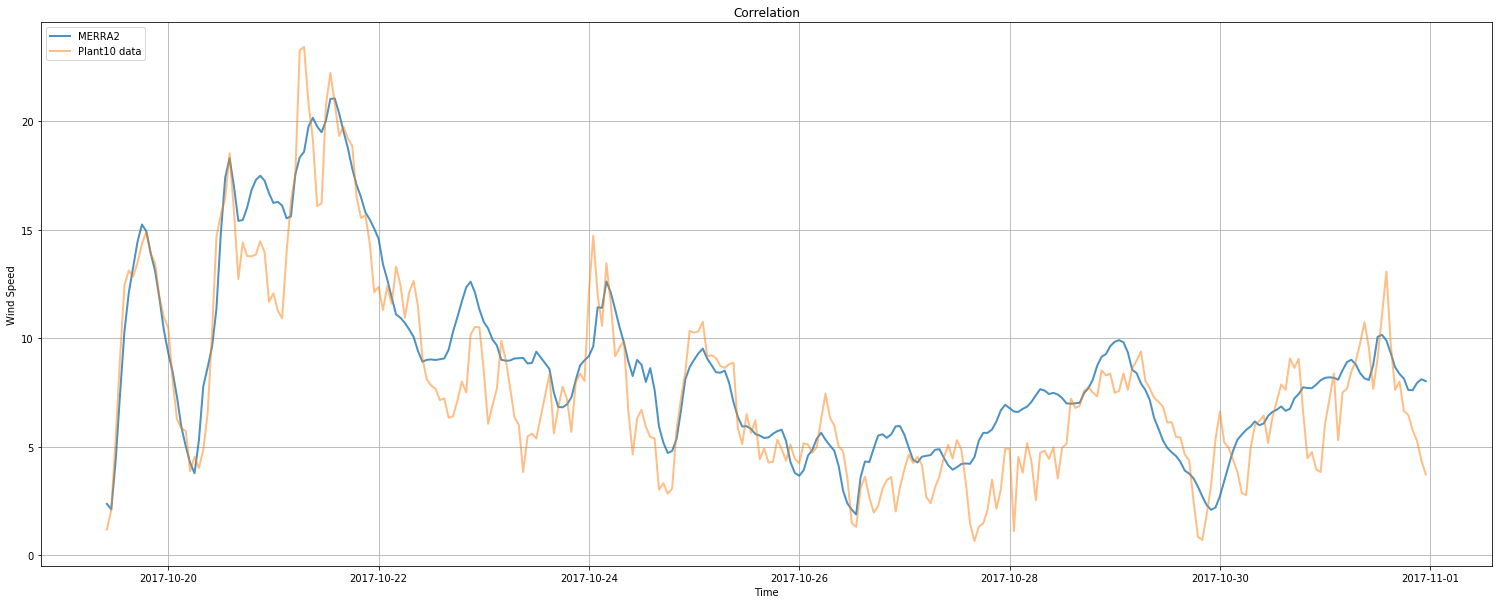

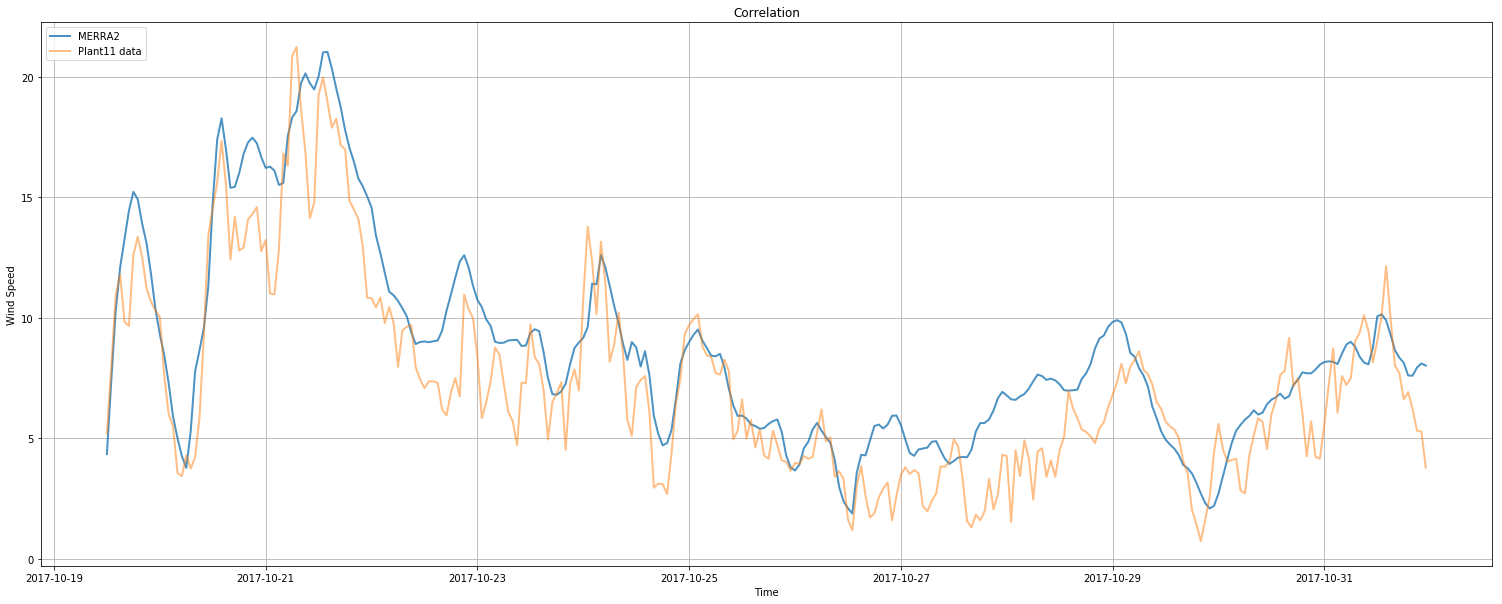

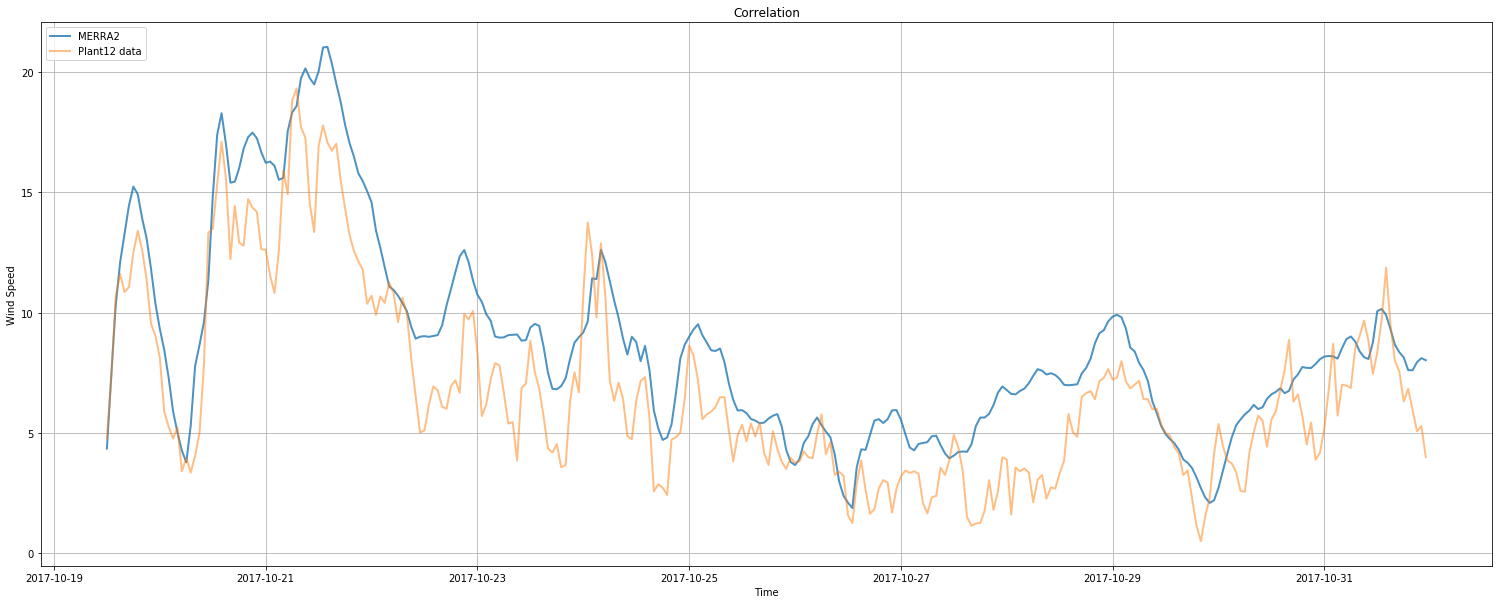

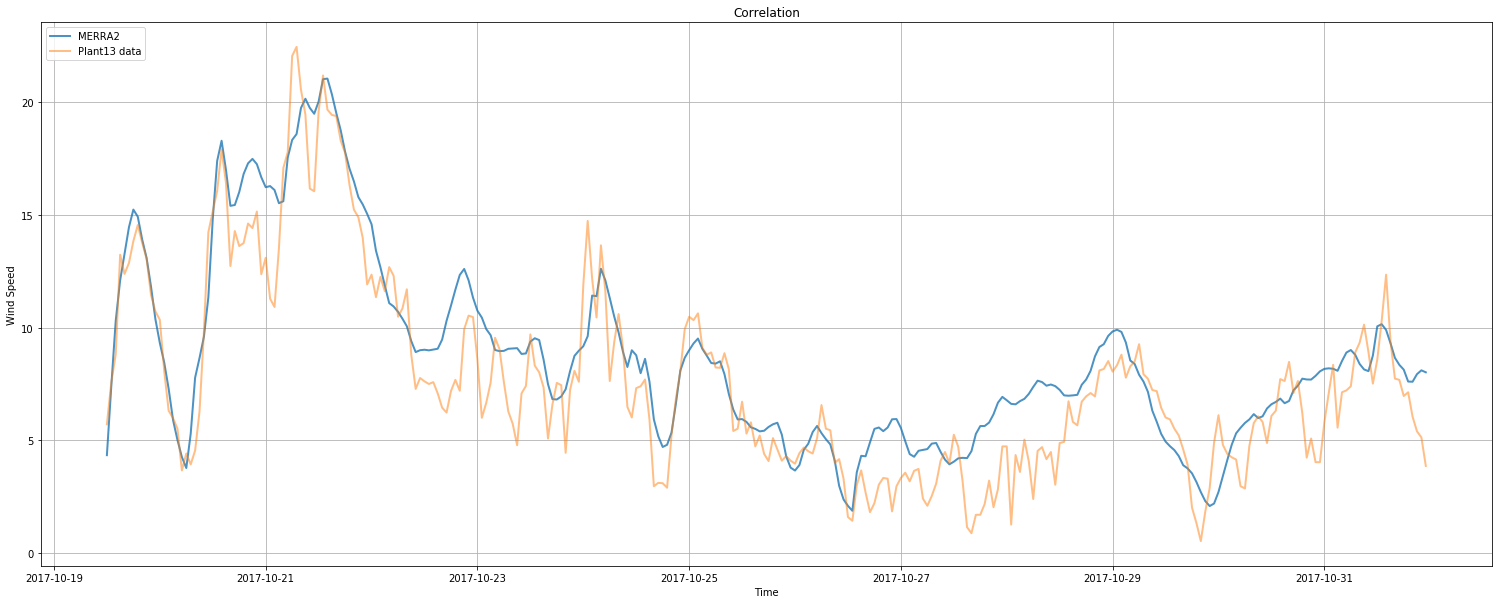

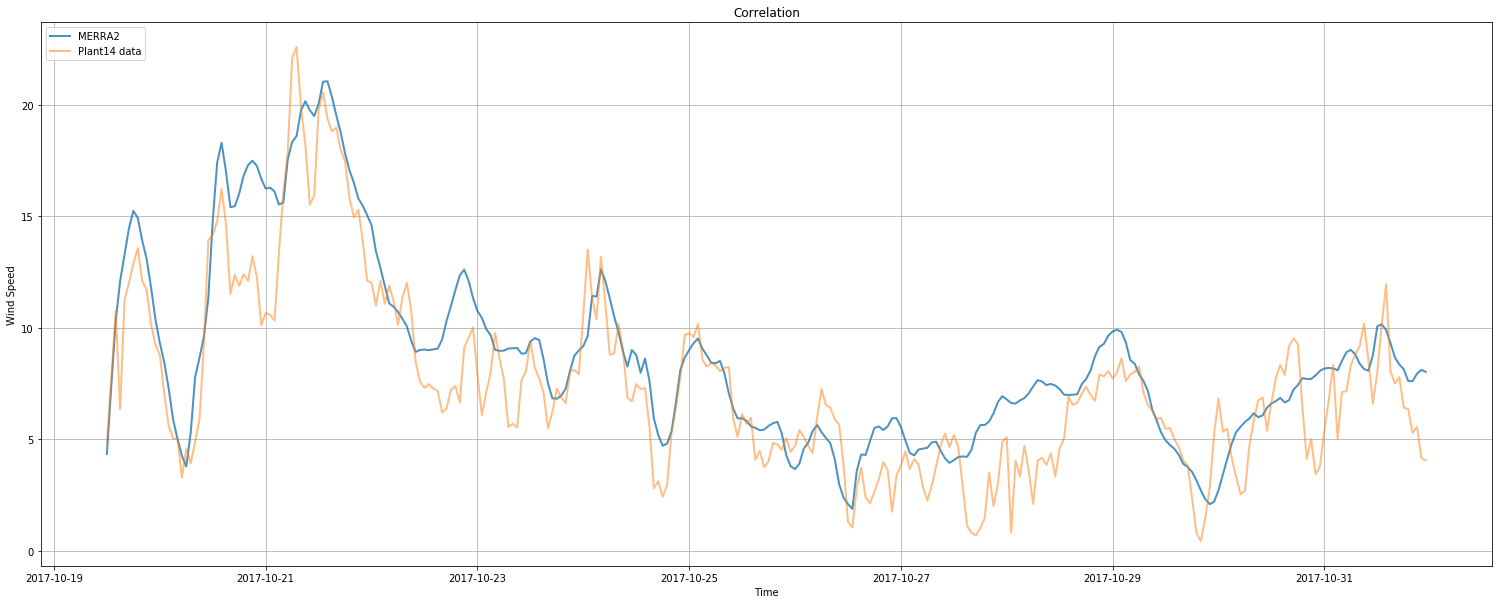

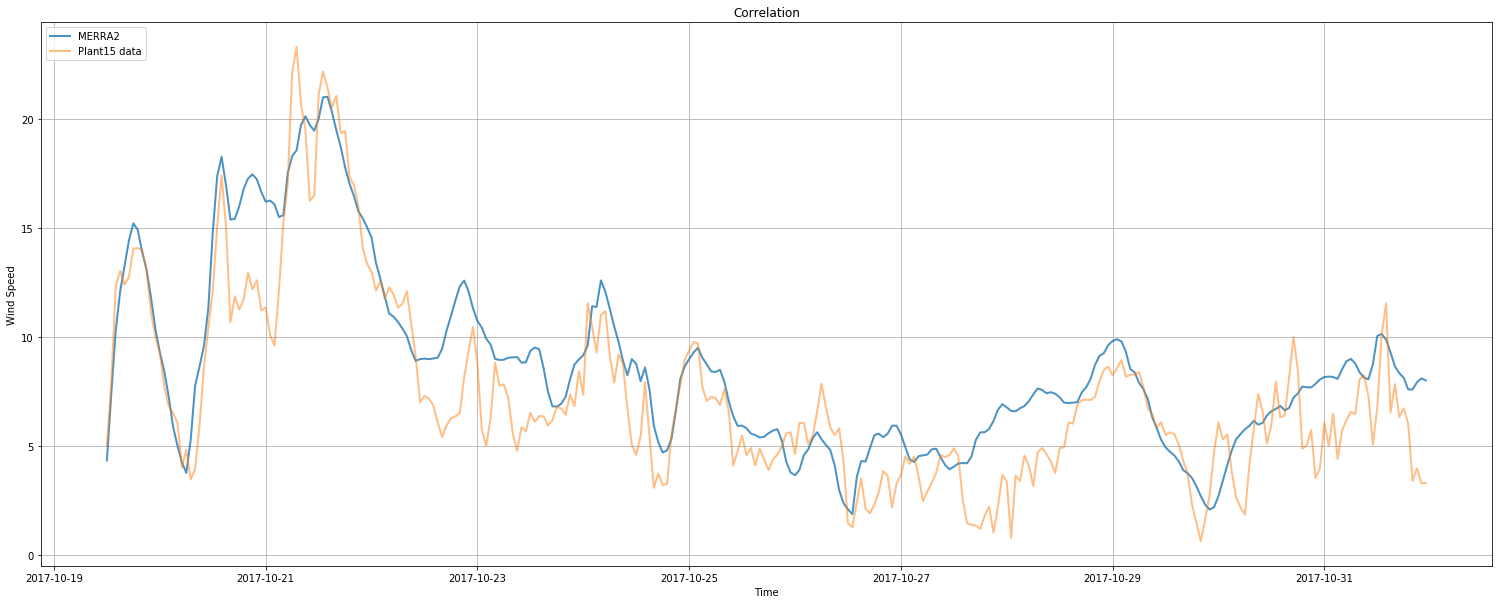

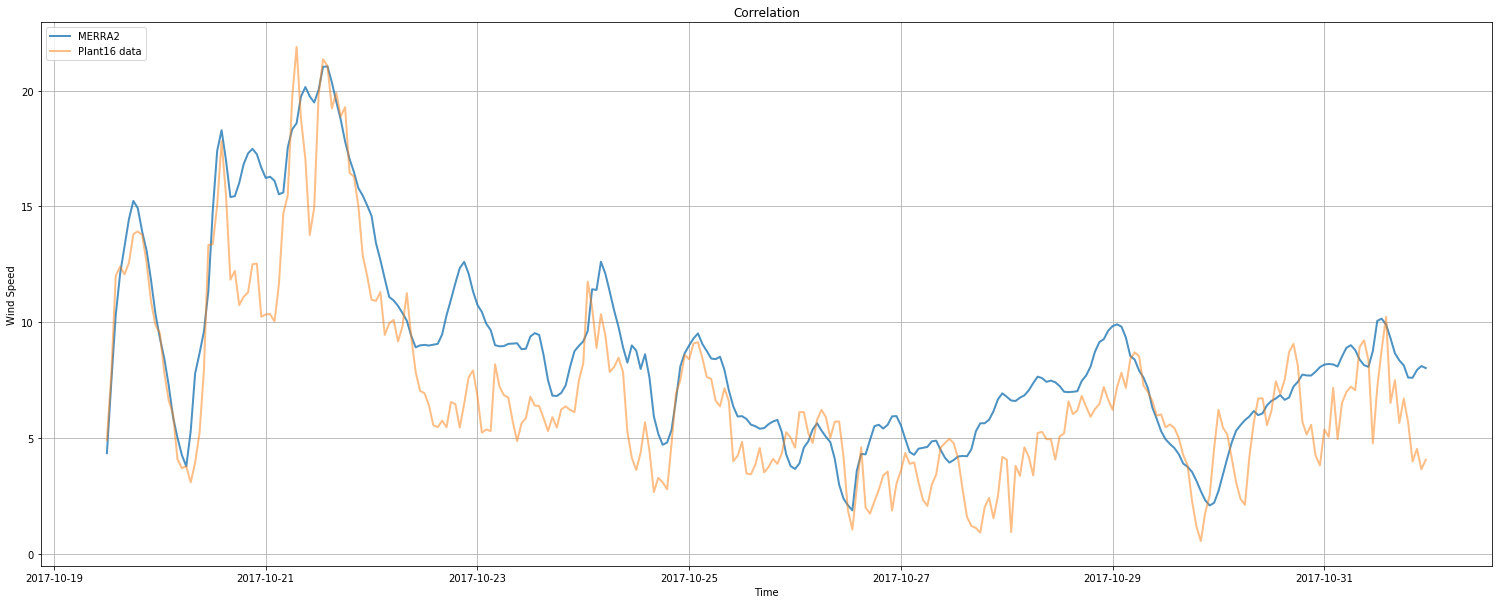

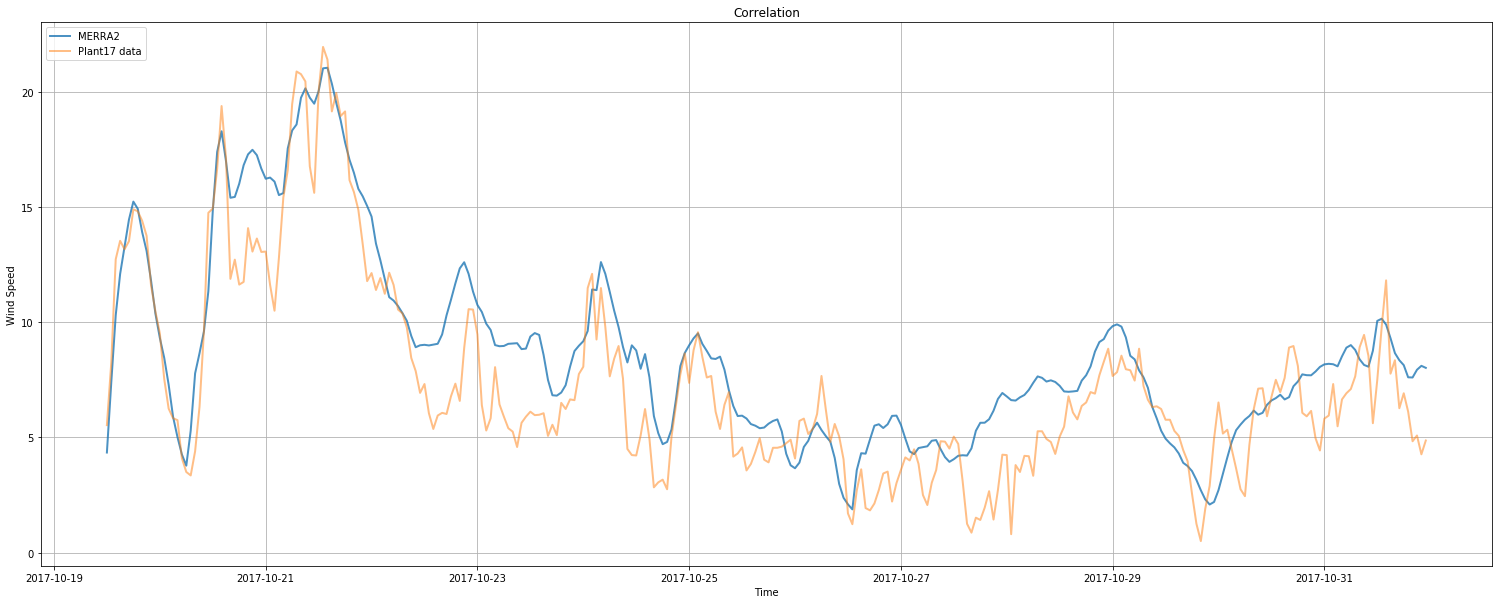

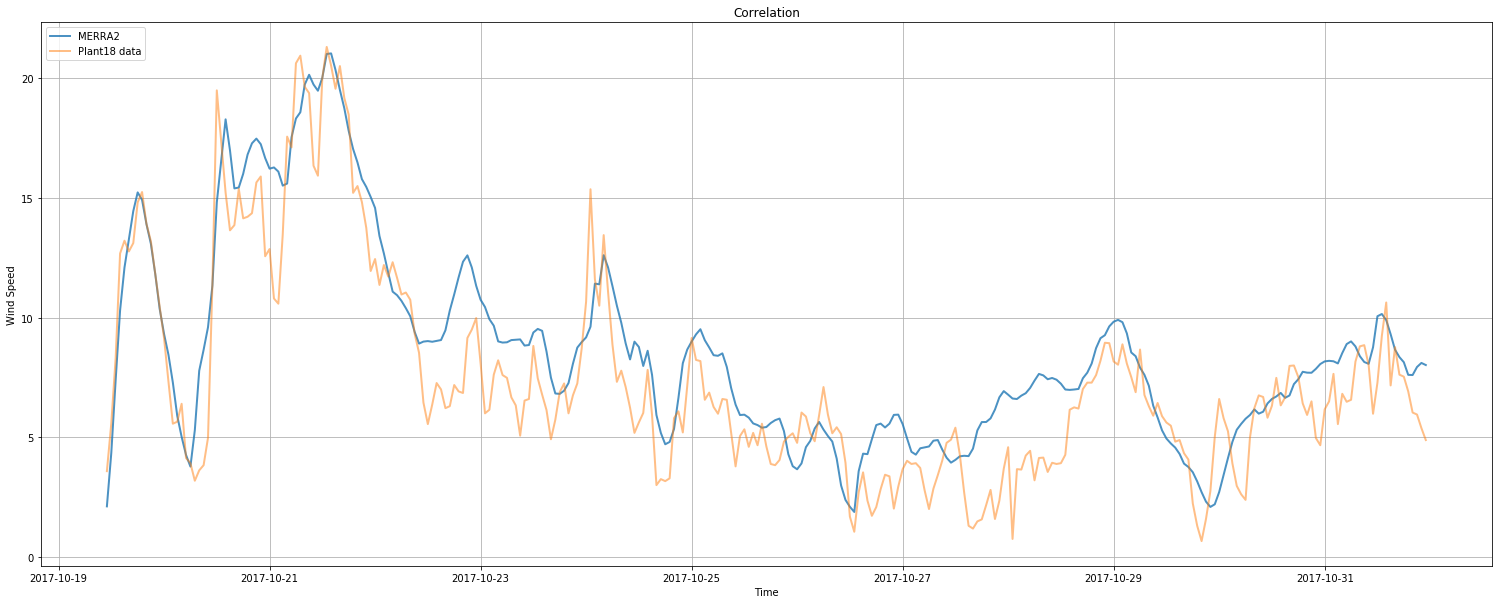

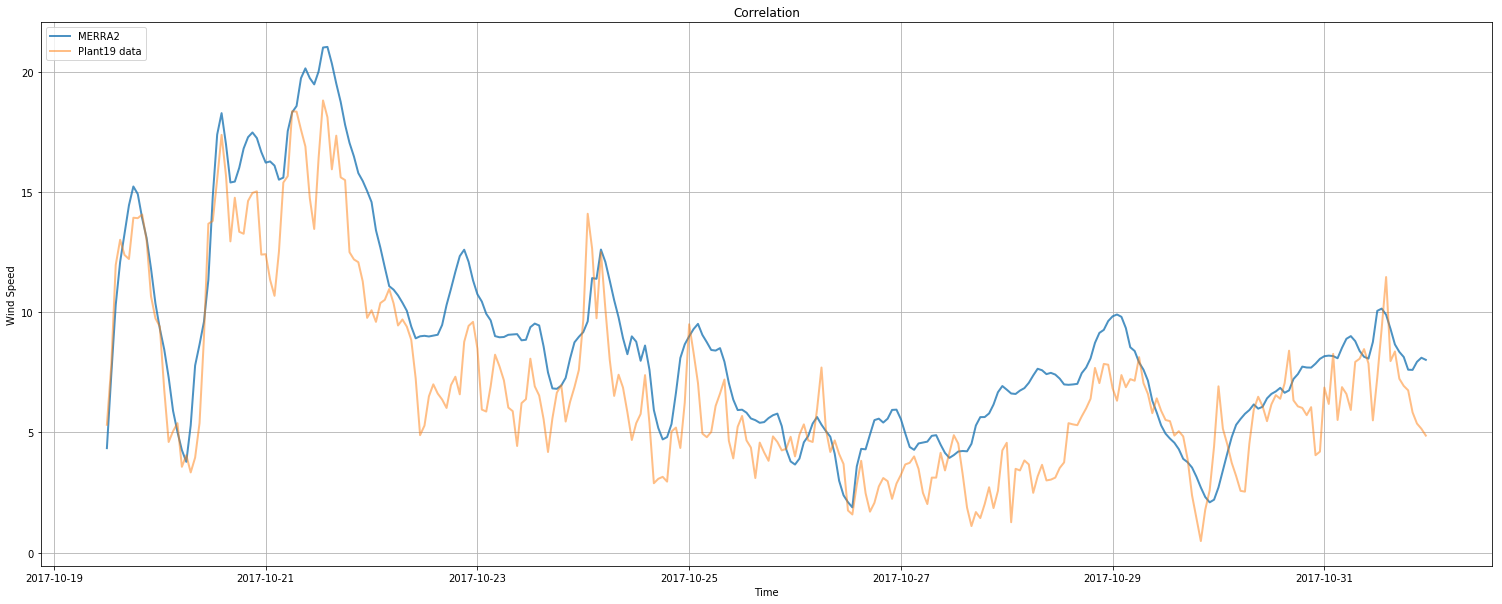

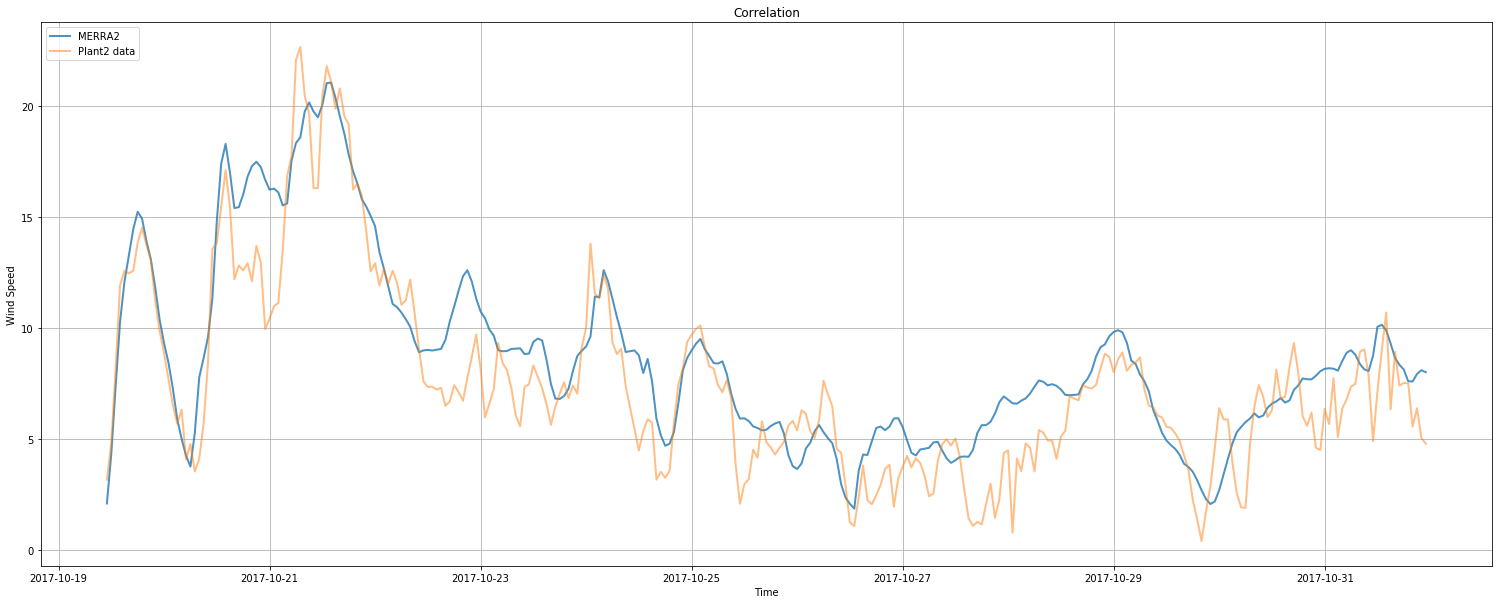

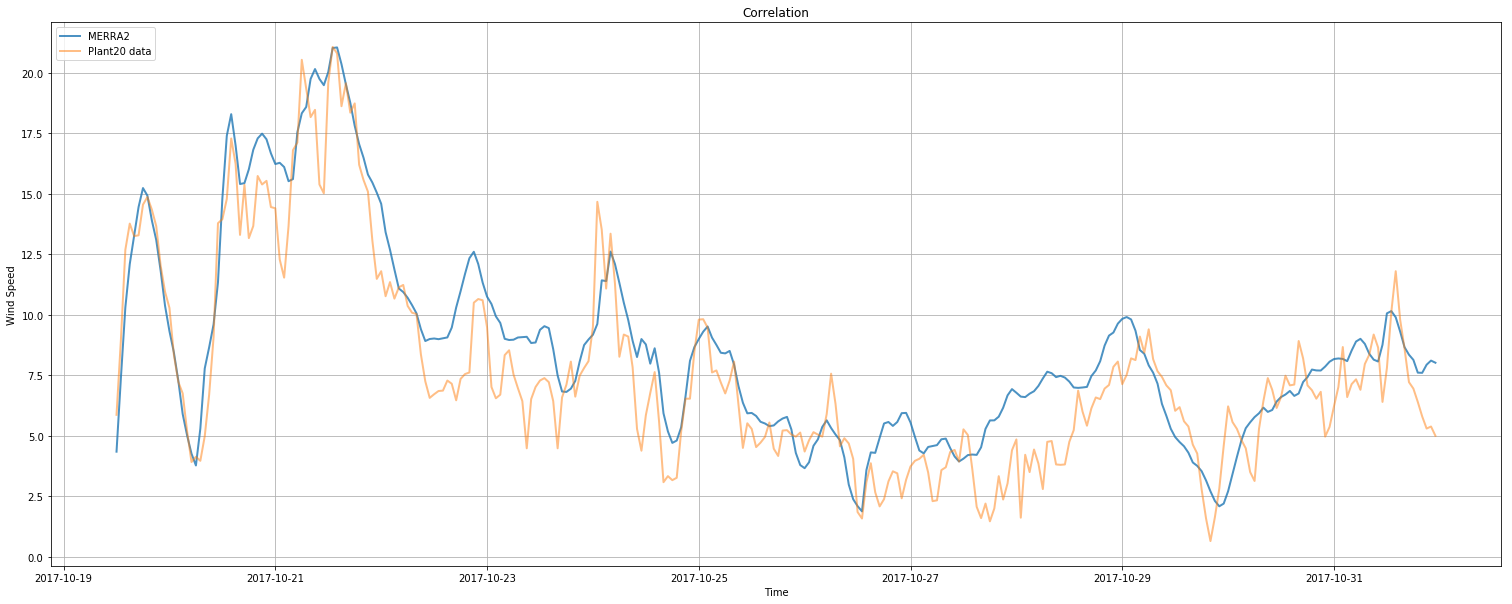

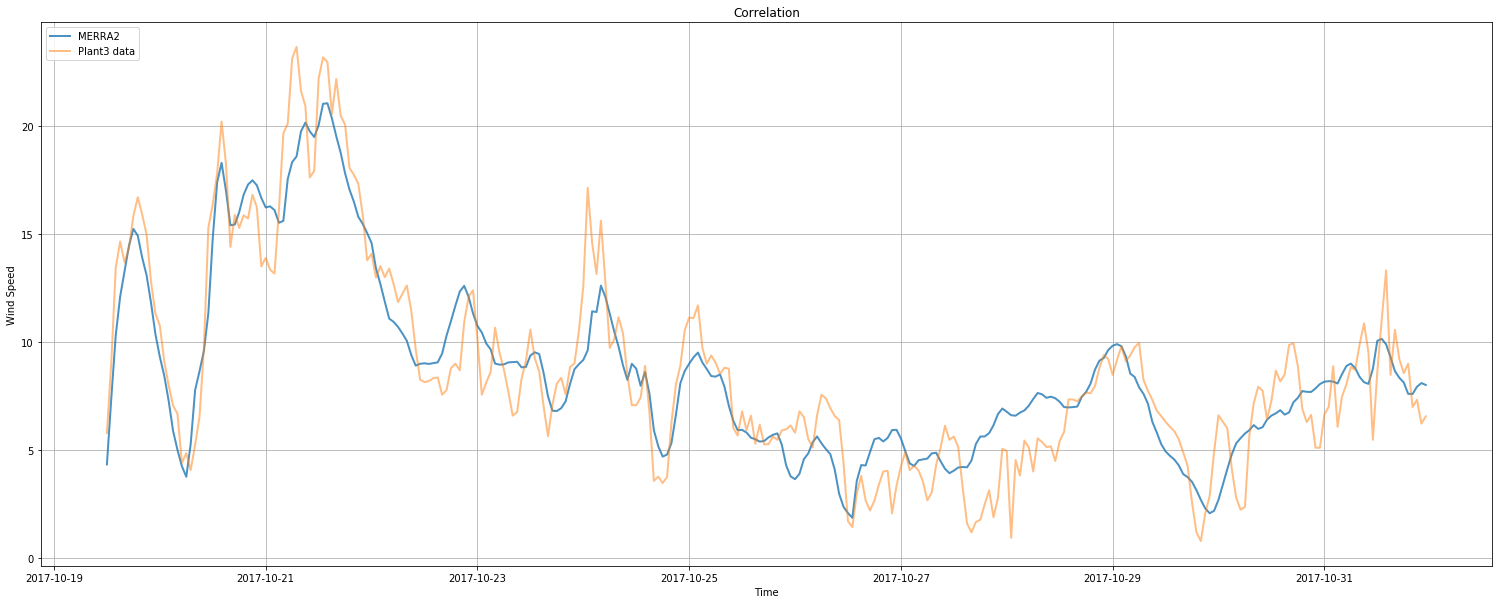

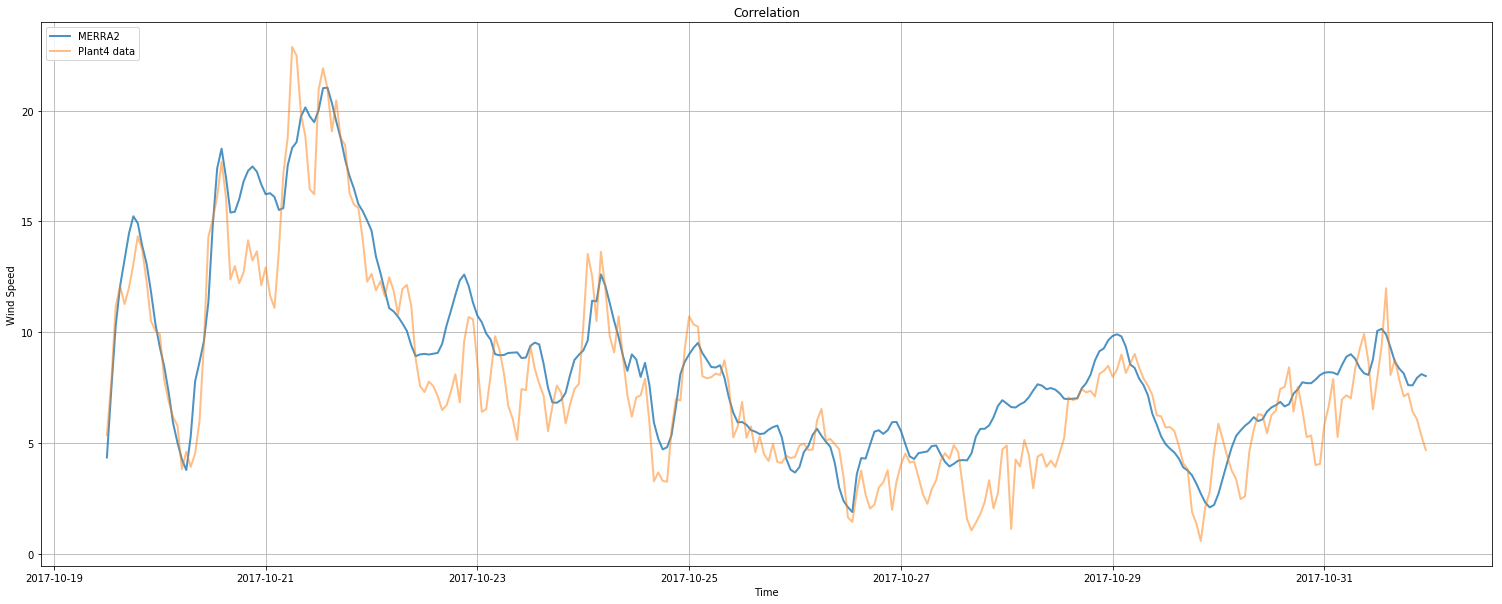

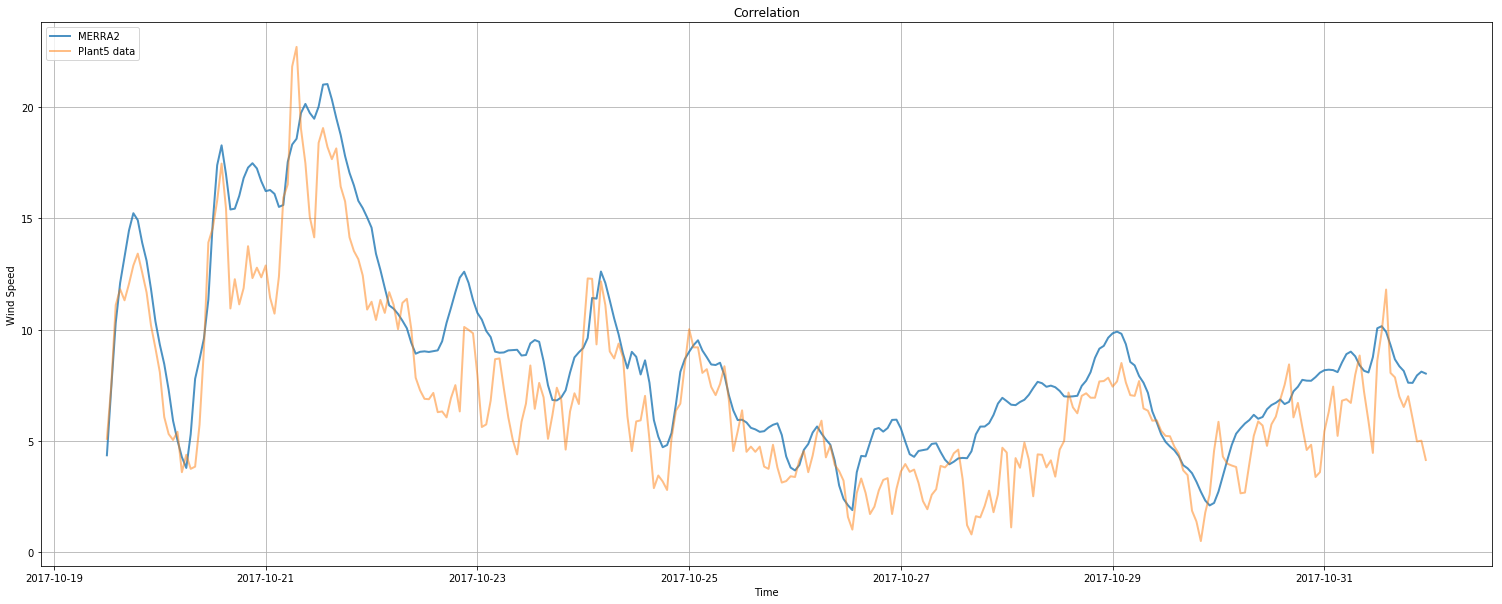

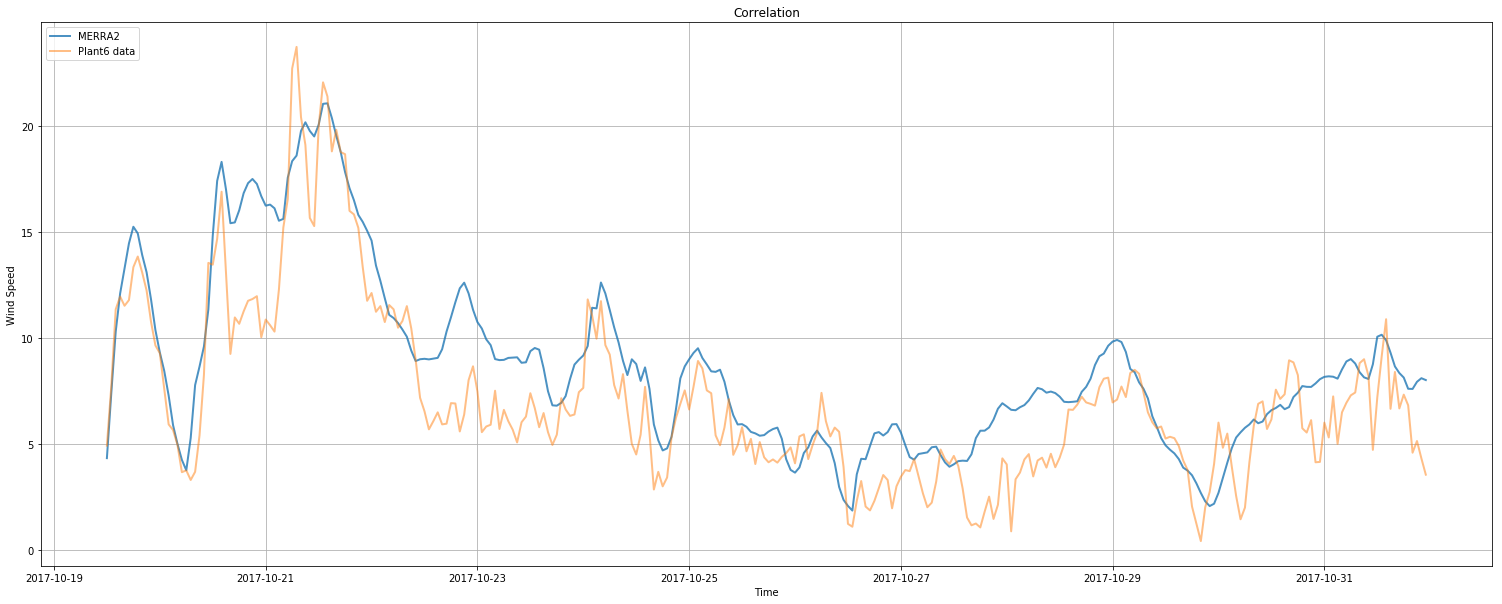

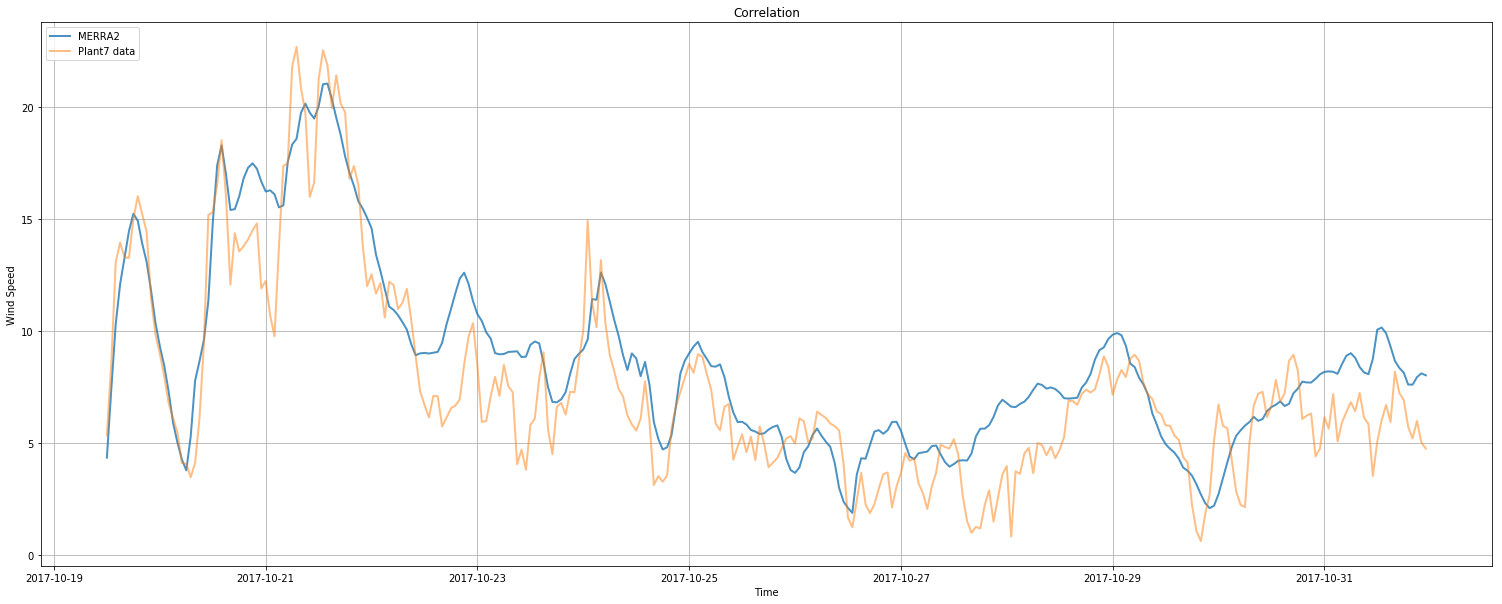

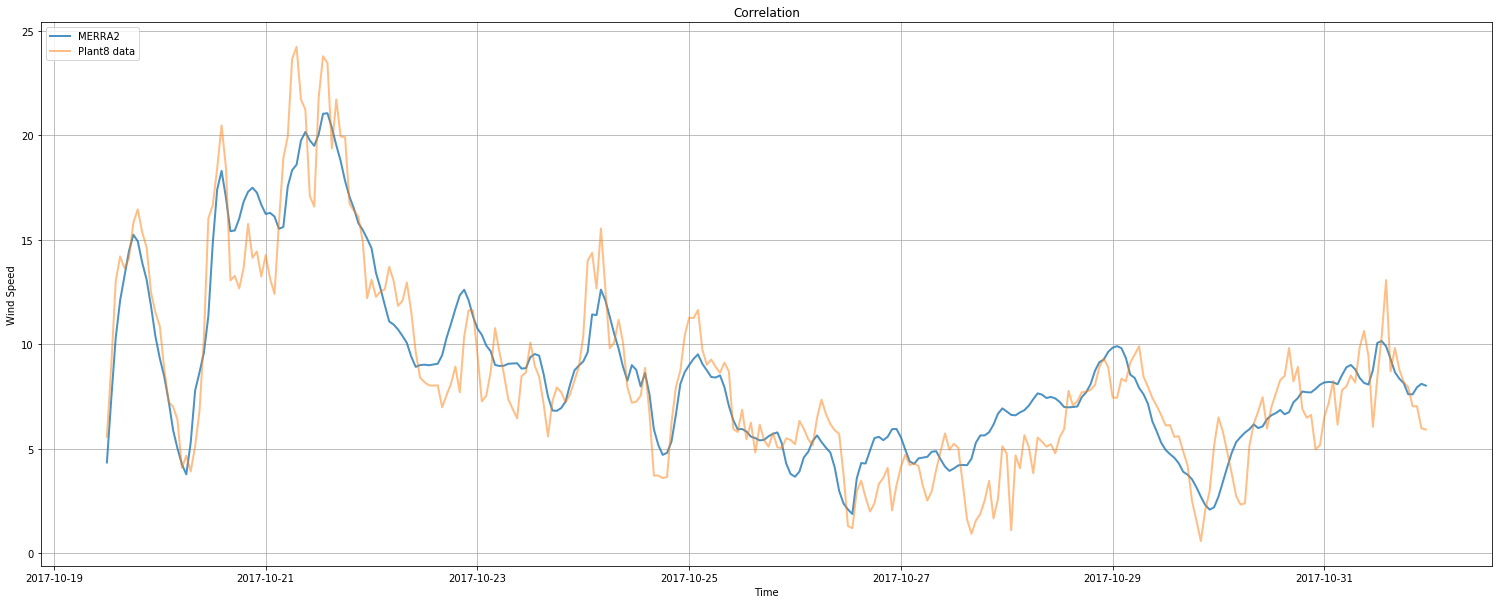

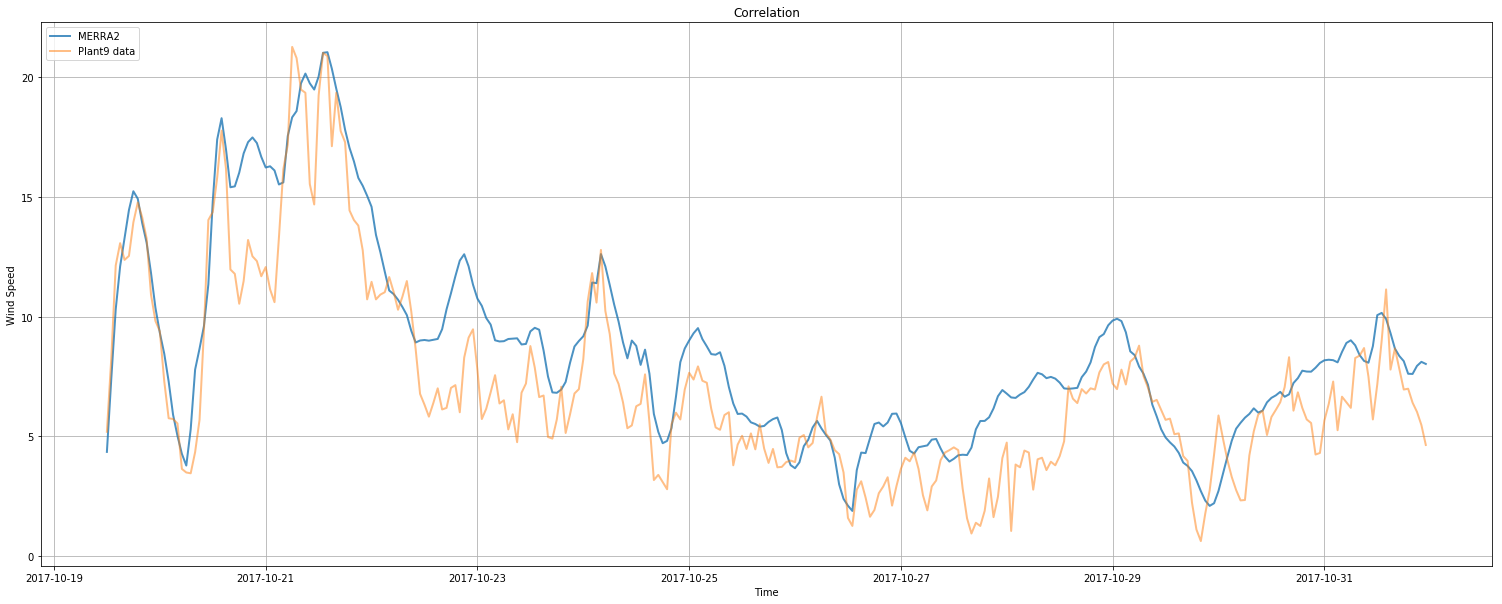

In [9]:
#Finding overlapping indexes from both the datasets
for plant_key in hourly_plants_data.keys():
    overlap_idx, coverage = overlap(merra2, hourly_plants_data[plant_key])
    print("Data for Plant ", plant_key)
    print("Coverage:", coverage);
    
    
    #Linear Regression
    m_vs_c = LinearRegression()
    m_vs_c.fit(hourly_plants_data[plant_key]['mrwsmpvwi'][overlap_idx].values.reshape(-1,1),merra2['WS50m_m/s'][overlap_idx].values.reshape(-1,1))
    r2 = m_vs_c.score(hourly_plants_data[plant_key]['mrwsmpvwi'][overlap_idx].values.reshape(-1,1),merra2['WS50m_m/s'][overlap_idx].values.reshape(-1,1),) 
    print("R2 coefficient:",r2)
    
    #SVM
    site_train, site_test, merra_train, merra_test = train_test_split(hourly_plants_data[plant_key]['mrwsmpvwi'][overlap_idx].values.reshape(-1,1),\
                                                    merra2['WS50m_m/s'][overlap_idx].values.reshape(-1,1), test_size=0.3, random_state=100)

    check_svm(site_train, site_test, merra_train, merra_test, "rbf")
    check_svm(site_train, site_test, merra_train, merra_test, "linear")
    #check_svm(valentia_train, valentia_test, site_train, site_test, "poly")
    check_svm(site_train, site_test, merra_train, merra_test, "sigmoid")
    
    #Plot time series
    timeseries_plot(overlap_idx, merra2['WS50m_m/s'],hourly_plants_data[plant_key]['mrwsmpvwi'],'MERRA2', 'Plant'+str(plant_key)+' data')

In [16]:
first_key = list(hourly_plants_data.keys())[0]
second_key = list(hourly_plants_data.keys())[1]
overlap_idx_cmb, coverage = overlap(merra2, hourly_plants_data[first_key])
for plant_key in hourly_plants_data.keys():
    overlap_idx_cmb = hourly_plants_data[plant_key].index.intersection( overlap_idx_cmb)
combined_data = pd.concat([hourly_plants_data[second_key]['mrwsmpvwi'][overlap_idx_cmb], hourly_plants_data[first_key]['mrwsmpvwi'][overlap_idx_cmb]], axis=1)
for plant_key in list(hourly_plants_data.keys())[2:]: 
    print(plant_key)
    combined_data = pd.concat([combined_data, hourly_plants_data[second_key]['mrwsmpvwi']], join='inner',axis=1)

combined = LinearRegression()
combined.fit(combined_data, merra2['WS50m_m/s'][overlap_idx][overlap_idx_cmb].values.reshape(-1,1))
r2 = combined.score(combined_data, merra2['WS50m_m/s'][overlap_idx][overlap_idx_cmb].values.reshape(-1,1))
print("R2 coefficient:",r2)

combined_train, combined_test, merra2_train, merra2_test = train_test_split(combined_data.values.reshape(-1,len(hourly_plants_data.keys())),\
                                                     merra2['WS50m_m/s'][overlap_idx_cmb].values.reshape(-1,1), test_size=0.3, random_state=100)


check_svm(site_train, site_test,combined_train, combined_test,  "rbf")
check_svm(site_train, site_test,combined_train, combined_test,  "linear")
#check_svm(valentia_train, valentia_test, site_train, site_test, "poly")
check_svm(site_train, site_test,combined_train, combined_test,  "sigmoid")


11
12
13
14
15
16
17
18
19
2
20
3
4
5
6
7
8
9
R2 coefficient: 0.80421653635


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean-absolute error ( rbf ): 1.22567145696
Mean-absolute error ( linear ): 1.24102802985
Mean-absolute error ( sigmoid ): 19.0299015733


In [13]:
print(combined_train.shape)
print(combined_test.shape)
print(site_train.shape)
print(site_test.shape)

(50905, 20)
(21817, 20)
(50905, 1)
(21817, 1)
